In [78]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [79]:
ds_path = os.getcwd().removesuffix('notebook\\eda')+'datasets\\'
artifacts_path = os.getcwd().removesuffix('notebook\\eda')+'artifacts\\'
os.makedirs(artifacts_path, exist_ok=True)
we_path = ds_path + 'we.csv'
age_path = ds_path + 'age.csv'
fr_path = ds_path + 'fr.csv'
gdp_path = ds_path + 'gdp.csv'

In [80]:
we, fr, gdp, age = pd.read_csv(we_path), pd.read_csv(fr_path), pd.read_csv(gdp_path), pd.read_csv(age_path)

In [81]:
we.rename(columns={'Combined - average years of education for 15-64 years female youth and adults':'we_avg_yr'},inplace=True)
fr.rename(columns={'Fertility rate - Sex: all - Age: all - Variant: estimates':'fr'},inplace=True)
gdp.rename(columns={'GDP, PPP (constant 2017 international $)':'gdp_ppp'},inplace=True)
age.rename(columns={'Median age - Sex: all - Age: all - Variant: estimates':'median_age'},inplace=True)

### Year Range

In [82]:
year_min, year_max = max(we['Year'].min(),fr['Year'].min(),gdp['Year'].min(),age['Year'].min()), min(we['Year'].max(),fr['Year'].max(),gdp['Year'].max(),age['Year'].max())

In [83]:
year_min, year_max

(np.int64(1990), np.int64(2022))

In [84]:
countries = ['United States', 'India', 'Germany']
all_years = { i for i in range(year_min, year_max+1)}

### we Missing Years

In [85]:
print('Missing Years')
for i in countries:
    print(f'{i} : {all_years - set(we[we['Entity']==i]['Year'].to_list())}')

Missing Years
United States : set()
India : set()
Germany : set()


### FR Missing Years

In [86]:
print('Missing Years')
for i in countries:
    print(f'{i} : {all_years - set(fr[fr['Entity']==i]['Year'].to_list())}')

Missing Years
United States : set()
India : set()
Germany : set()


### GDP Missing Years

In [87]:
print('Missing Years')
for i in countries:
    print(f'{i} : {all_years - set(gdp[gdp['Entity']==i]['Year'].to_list())}')

Missing Years
United States : set()
India : set()
Germany : set()


### Filtering DFs wrt countries

In [88]:
print('Missing Years')
for i in countries:
    print(f'{i} : {all_years - set(age[age['Entity']==i]['Year'].to_list())}')

Missing Years
United States : set()
India : set()
Germany : set()


In [89]:
filtered_we = we[we['Entity'].isin(countries) & we['Year'].isin(all_years)]
filtered_fr = fr[fr['Entity'].isin(countries) & fr['Year'].isin(all_years)]
filtered_gdp = gdp[gdp['Entity'].isin(countries) & gdp['Year'].isin(all_years)]
filtered_age = age[age['Entity'].isin(countries) & age['Year'].isin(all_years)]

In [90]:
filtered_we = filtered_we[['Entity','Year','we_avg_yr']]
filtered_fr = filtered_fr[['Entity','Year','fr']]
filtered_gdp = filtered_gdp[['Entity','Year','gdp_ppp']]
filtered_age = filtered_age[['Entity','Year','median_age']]

In [91]:
filtered_gdp['gdp_ppp']=filtered_gdp['gdp_ppp']/1_000_000_000

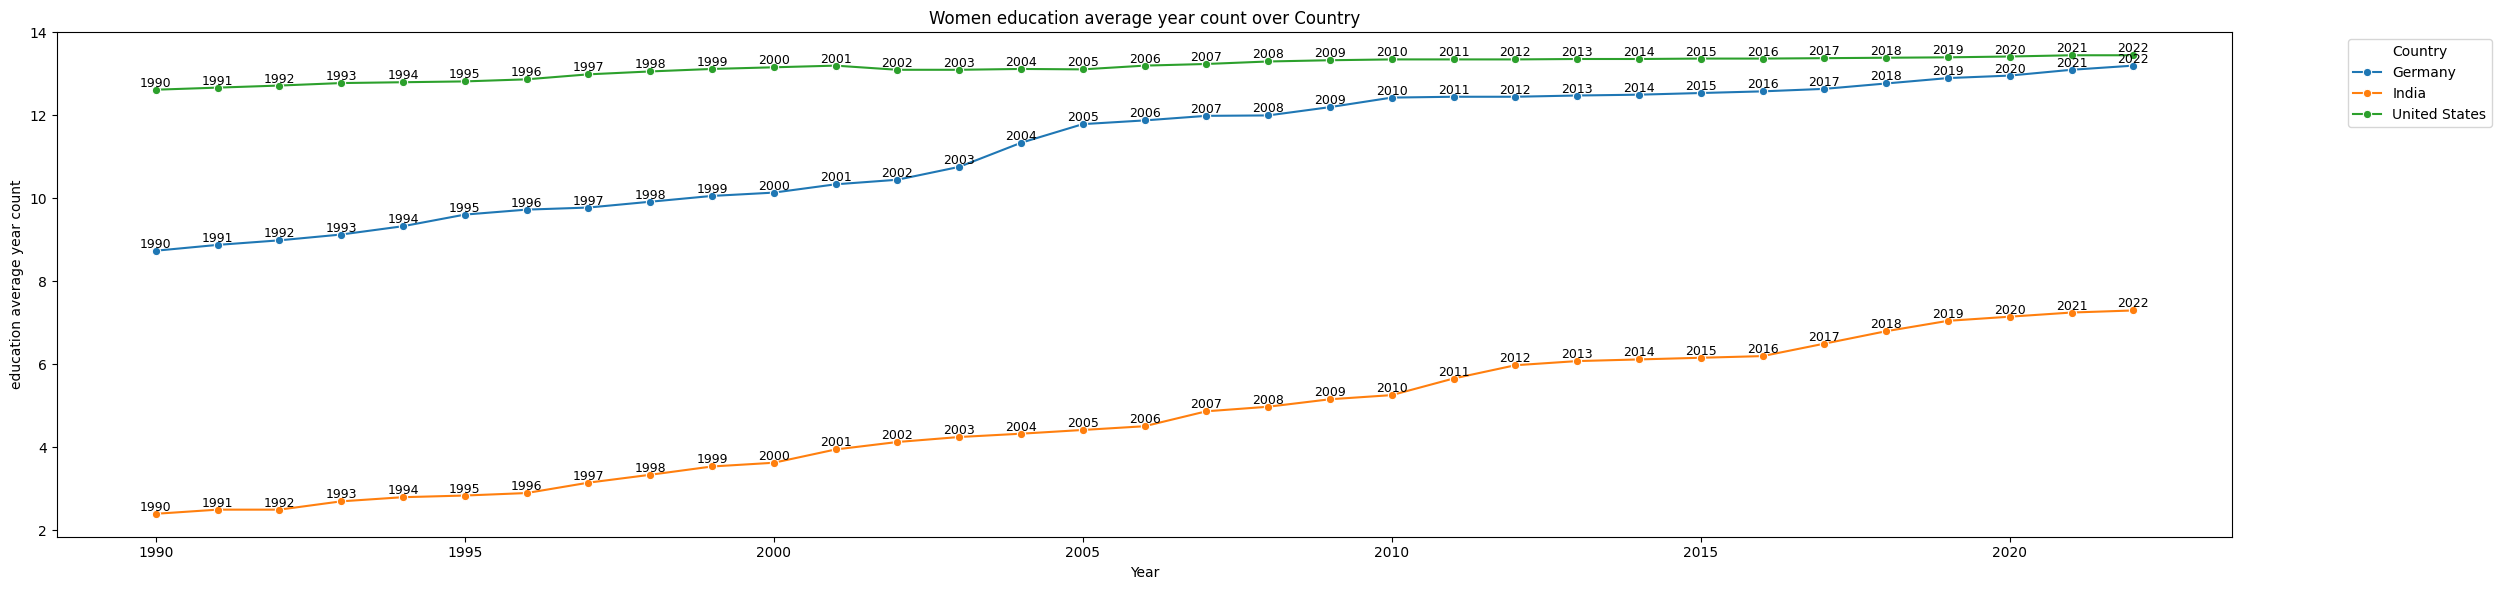

In [92]:
# Set palette
sns.set_palette("tab10")  # You can change the palette as needed

# Create a line plot
plt.figure(figsize=(25, 6))  # Adjust the size of the plot if needed
sns.lineplot(data=filtered_we, x='Year', y='we_avg_yr', hue='Entity', marker='o')

# Title and labels
plt.title('Women education average year count over Country')
plt.xlabel('Year')
plt.ylabel('education average year count')

# Add labels over the points
for line in plt.gca().get_lines():  # Loop over each line in the plot
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    for i in range(len(x_data)):
        plt.text(x_data[i], y_data[i], str(int(x_data[i])), ha='center', va='bottom', fontsize=9, color='black')

# Show the plot
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


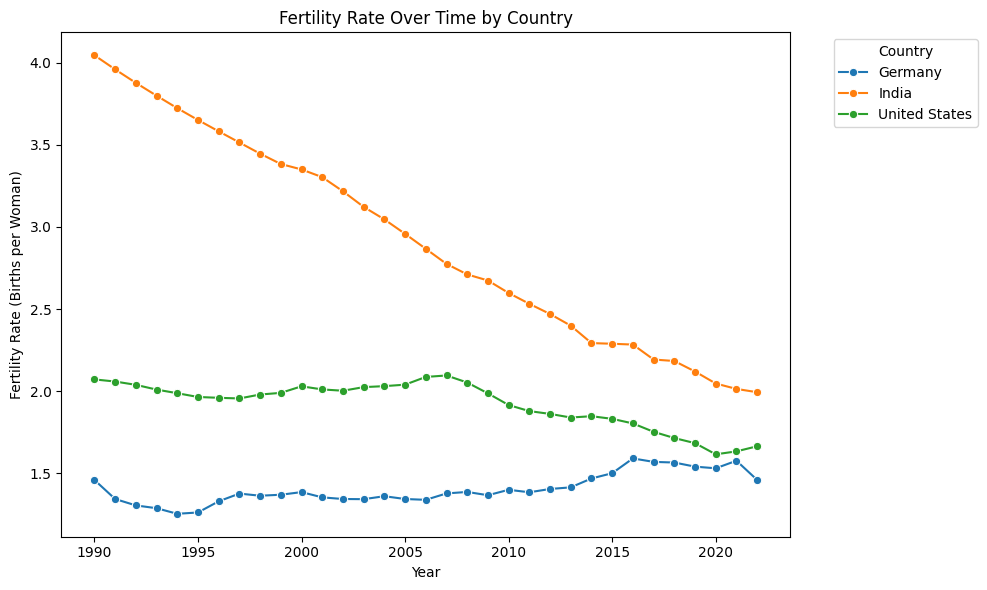

In [93]:
# Set the color palette for countries
sns.set_palette("tab10")  # You can change the palette as needed

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the size of the plot if needed
sns.lineplot(data=filtered_fr, x='Year', y='fr', hue='Entity', marker='o')

# Title and labels
plt.title('Fertility Rate Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Fertility Rate (Births per Woman)')

# Show the plot
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

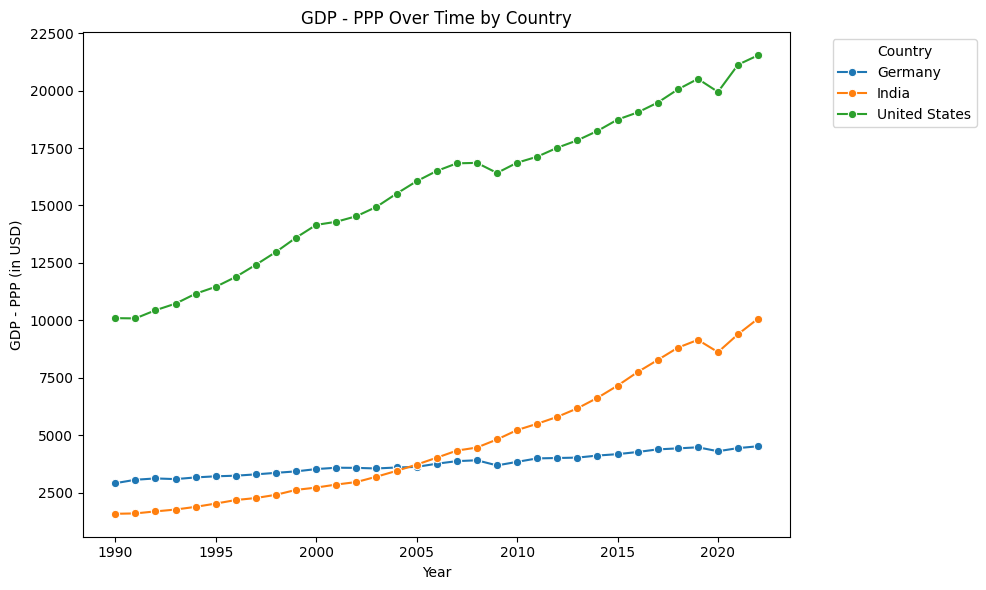

In [94]:
# Set the color palette for countries
sns.set_palette("tab10")  # You can change the palette as needed

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the size of the plot if needed
sns.lineplot(data=filtered_gdp, x='Year', y='gdp_ppp', hue='Entity', marker='o')

# Title and labels
plt.title('GDP - PPP Over Time by Country')
plt.xlabel('Year')
plt.ylabel('GDP - PPP (in USD)')

# Show the plot
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

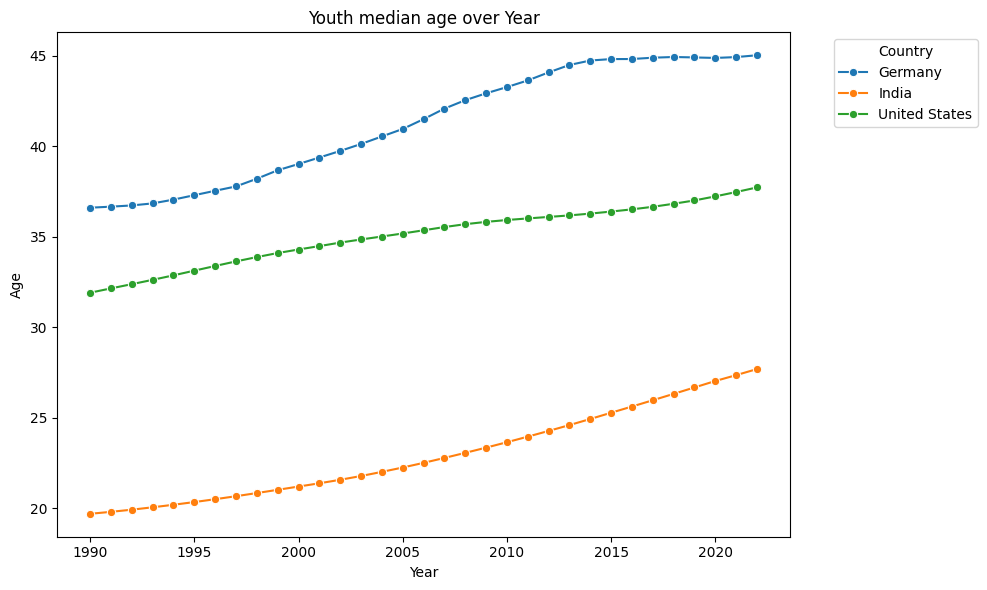

In [95]:
# Set the color palette for countries
sns.set_palette("tab10")  # You can change the palette as needed

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the size of the plot if needed
sns.lineplot(data=filtered_age, x='Year', y='median_age', hue='Entity', marker='o')

# Title and labels
plt.title('Youth median age over Year')
plt.xlabel('Year')
plt.ylabel('Age')

# Show the plot
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [96]:
tmp_df1 = pd.merge(filtered_we, filtered_fr, how='outer', on=['Entity','Year'])
tmp_df2 = pd.merge(tmp_df1, filtered_gdp, how='outer', on=['Entity', 'Year'])
tmp_df3 = pd.merge(tmp_df2, filtered_age, how='outer', on=['Entity', 'Year'])

In [97]:
merged_df = tmp_df3.filter(items=['Entity','Year','we_avg_yr','fr','median_age','gdp_ppp'])

In [ ]:
print(merged_df.to_string())

           Entity  Year  we_avg_yr     fr  median_age       gdp_ppp
0         Germany  1990       8.74  1.460      36.600   2915.150994
1         Germany  1991       8.88  1.344      36.658   3064.064531
2         Germany  1992       8.99  1.305      36.726   3122.988838
3         Germany  1993       9.13  1.288      36.838   3092.481927
4         Germany  1994       9.33  1.254      37.047   3166.450757
5         Germany  1995       9.61  1.262      37.292   3215.345395
6         Germany  1996       9.73  1.330      37.536   3241.255385
7         Germany  1997       9.78  1.377      37.776   3299.343894
8         Germany  1998       9.92  1.364      38.200   3365.790462
9         Germany  1999      10.06  1.370      38.669   3429.311718
10        Germany  2000      10.14  1.386      39.015   3529.190523
11        Germany  2001      10.34  1.354      39.373   3588.532750
12        Germany  2002      10.45  1.344      39.737   3581.428394
13        Germany  2003      10.76  1.343      4

In [99]:
merged_df.to_csv(artifacts_path+'eco-1990-2022.csv',index=False)